In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('C:/Users/trevo/Downloads/EMA Algo - Sheet1.csv')
df.columns = df.columns.str.strip()
#I preformatted a csv file via Google Sheets and extracts from Yahoo Finance

In [3]:
df.head()

,Date,IWO,QQQ,TLT
0,2017-10-30,179.750000,151.580002,124.419998
1,2017-10-31,181.600006,152.149994,124.459999
2,2017-11-01,180.089996,152.100006,124.750000
3,2017-11-02,180.110001,151.809998,125.300003
4,2017-11-03,180.789993,153.270004,125.639999


In [4]:
#Determining % change and Exponential Moving Average (EMA) based on the ticker prices listed in my DataFrame
df['TLT % change'] = df['TLT'].pct_change()
df['QQQ % change'] = df['QQQ'].pct_change()
#EMA is calculated on IWO for this strategy
df['5 ema'] = df['IWO'].ewm(span=5, adjust = False).mean()
df['10 ema'] = df['IWO'].ewm(span=10, adjust = False).mean()
df['150 ema'] = df['IWO'].ewm(span=150, adjust = False).mean()

In [5]:
# 150th row onward are our pertinent rows
df2 = df.iloc[150:]

In [6]:
df2.head()

,Date,IWO,QQQ,TLT,TLT % change,QQQ % change,5 ema,10 ema,150 ema
150,2018-06-06,208.809998,175.860001,118.739998,-0.008103,0.005834,206.302110,204.592743,192.232538
151,2018-06-07,206.710007,174.429993,119.889999,0.009685,-0.008132,206.438075,204.977700,192.424293
152,2018-06-08,207.889999,174.440002,119.529999,-0.003003,0.000057,206.922050,205.507209,192.629136
153,2018-06-11,208.619995,174.910004,119.309998,-0.001841,0.002694,207.488032,206.073170,192.840936
154,2018-06-12,210.490005,175.830002,119.339996,0.000251,0.005260,208.488689,206.876231,193.074698


In [7]:
df2['QQQ buy'] = (df2['IWO'] > df2['150 ema']) | (df2['5 ema'] > df2['10 ema'])
df2['TLT buy'] = np.logical_not(df2['QQQ buy'])

C:\Users\trevo\AppData\Local\Temp\ipykernel_31788\1980125450.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['QQQ buy'] = (df2['IWO'] > df2['150 ema']) | (df2['5 ema'] > df2['10 ema'])
C:\Users\trevo\AppData\Local\Temp\ipykernel_31788\1980125450.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['TLT buy'] = np.logical_not(df2['QQQ buy'])


In [8]:
df2.head()

,Date,IWO,QQQ,TLT,TLT % change,QQQ % change,5 ema,10 ema,150 ema,QQQ buy,TLT buy
150,2018-06-06,208.809998,175.860001,118.739998,-0.008103,0.005834,206.302110,204.592743,192.232538,True,False
151,2018-06-07,206.710007,174.429993,119.889999,0.009685,-0.008132,206.438075,204.977700,192.424293,True,False
152,2018-06-08,207.889999,174.440002,119.529999,-0.003003,0.000057,206.922050,205.507209,192.629136,True,False
153,2018-06-11,208.619995,174.910004,119.309998,-0.001841,0.002694,207.488032,206.073170,192.840936,True,False
154,2018-06-12,210.490005,175.830002,119.339996,0.000251,0.005260,208.488689,206.876231,193.074698,True,False


In [9]:
df2['model'] = 100*(1 + (df2['QQQ buy'].shift(1)*df2['QQQ % change']) + (df2['TLT buy'].shift(1)*df2['TLT % change'])).cumprod()

C:\Users\trevo\AppData\Local\Temp\ipykernel_31788\1716805856.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['model'] = 100*(1 + (df2['QQQ buy'].shift(1)*df2['QQQ % change']) + (df2['TLT buy'].shift(1)*df2['TLT % change'])).cumprod()


In [10]:
df2.head()

,Date,IWO,QQQ,TLT,TLT % change,QQQ % change,5 ema,10 ema,150 ema,QQQ buy,TLT buy,model
150,2018-06-06,208.809998,175.860001,118.739998,-0.008103,0.005834,206.302110,204.592743,192.232538,True,False,NaN
151,2018-06-07,206.710007,174.429993,119.889999,0.009685,-0.008132,206.438075,204.977700,192.424293,True,False,99.186849
152,2018-06-08,207.889999,174.440002,119.529999,-0.003003,0.000057,206.922050,205.507209,192.629136,True,False,99.19254
153,2018-06-11,208.619995,174.910004,119.309998,-0.001841,0.002694,207.488032,206.073170,192.840936,True,False,99.459799
154,2018-06-12,210.490005,175.830002,119.339996,0.000251,0.005260,208.488689,206.876231,193.074698,True,False,99.982942


In [11]:
#Average Yearly Return
start_model = df2['model'].iloc[150]
end_model = df2['model'].iloc[-1]
years = (df2['model'].count()+1-150)/252
model_average_return = (end_model/start_model)**(1/years)-1
print(f"Yields {model_average_return * 100}% per year")

#Max Drawdown
df2['drawdown'] = (df2['model']/df2['model'].cummax()-1)*100
drawdown = df2['drawdown'].min()
print(f"Max drawdown is {drawdown}%")

Yields 9.632342641106728% per year
Max drawdown is -46.437558841953255%


C:\Users\trevo\AppData\Local\Temp\ipykernel_31788\2075299329.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['drawdown'] = (df2['model']/df2['model'].cummax()-1)*100


<AxesSubplot: title={'center': 'model'}>

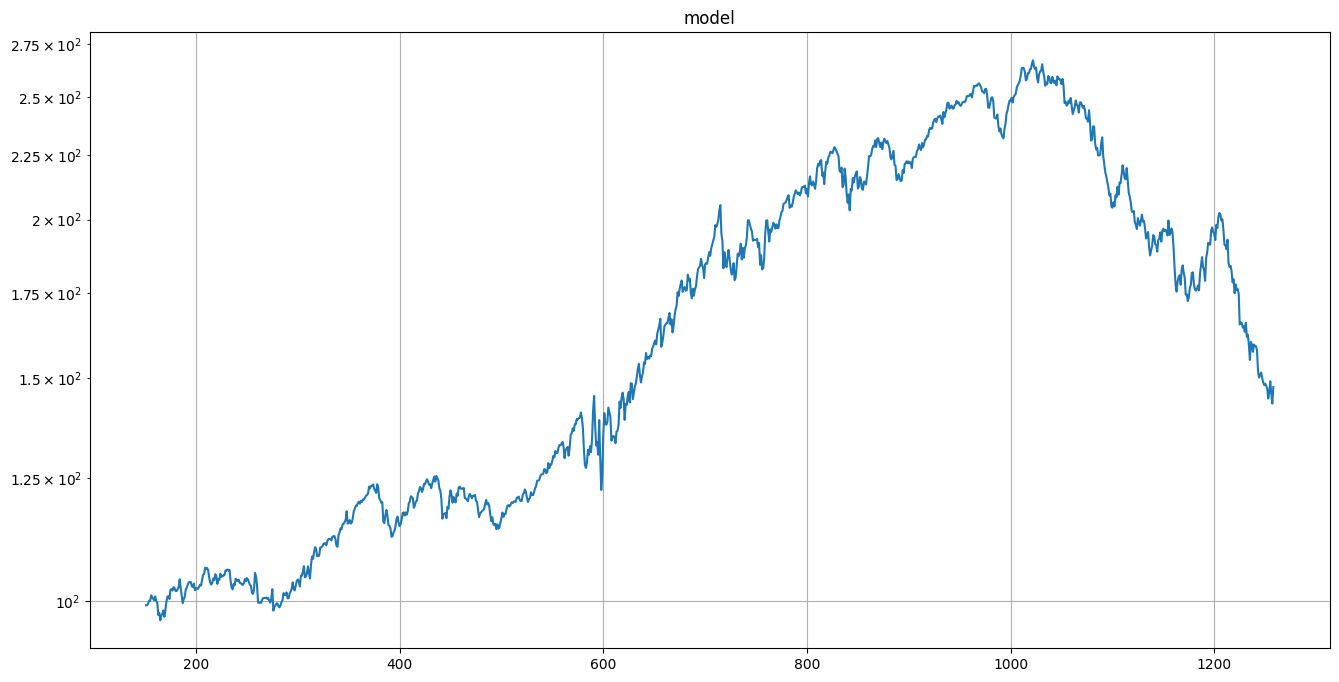

In [12]:
#Plotting our model
df2['model'].plot(grid=True, kind='line', title='model', logy=True, figsize = (16,8))

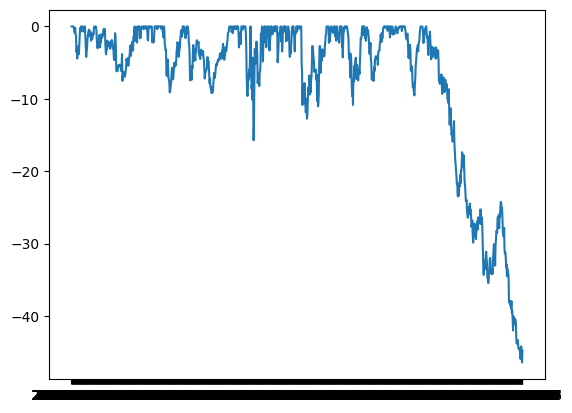

In [13]:
#Plotting max drawdown
x = df2['Date']
y = df2['drawdown']
plt.plot(x,y)
plt.rcParams["figure.figsize"] = (100,50)